# Attribute inference Attack (AIA) Dataset D

In [1]:
#import libraries
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os
print('Libraries imported!!')

Libraries imported!!


In [2]:
#define directory of functions and actual directory
HOME_PATH = '' #home path of the project
FUNCTIONS_DIR = 'EVALUATION FUNCTIONS/PRIVACY'
ACTUAL_DIR = os.getcwd()

#change directory to functions directory
os.chdir(HOME_PATH + FUNCTIONS_DIR)

#import functions for membership attack simulation
from attribute_inference import DataPreProcessor
from attribute_inference import RiskAttributesPredictors
from attribute_inference import identified_attributes_percentage

#change directory to actual directory
os.chdir(ACTUAL_DIR)
print('Functions imported!!')

Functions imported!!


## 1. Read real and synthetic datasets
In this part real and synthetic datasets are read.

In [3]:
#Define global variables
DATA_TYPES = ['Real','GM','SDV','CTGAN','WGANGP']
SYNTHESIZERS = ['GM','SDV','CTGAN','WGANGP']
FILEPATHS = {'Real' : HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv',
            'GM' : HOME_PATH + 'SYNTHETIC DATASETS/GM/D_ContraceptiveMethod_Synthetic_GM.csv',
            'SDV' : HOME_PATH + 'SYNTHETIC DATASETS/SDV/D_ContraceptiveMethod_Synthetic_SDV.csv',
            'CTGAN' : HOME_PATH + 'SYNTHETIC DATASETS/CTGAN/D_ContraceptiveMethod_Synthetic_CTGAN.csv',
            'WGANGP' : HOME_PATH + 'SYNTHETIC DATASETS/WGANGP/D_ContraceptiveMethod_Synthetic_WGANGP.csv'}
categorical_columns = ['wife_education','husband_education','wife_religion','wife_working','husband_occupation',
                        'standard_of_living_index','media_exposure','contraceptive_method_used']
data = dict()

qid_columns = ['wife_age','wife_education','wife_religion','wife_working']
risk_attributes = ['children','husband_education','husband_occupation', 'standard_of_living_index','media_exposure',
                   'contraceptive_method_used']
data = dict()
data_qid = dict()
data_risk = dict()

In [4]:
#iterate over all datasets filepaths and read each dataset
for name, path in FILEPATHS.items() :
    data[name] = pd.read_csv(path)
    #data[name] = data[name].drop(['id'],axis=1)
    for col in categorical_columns :
        data[name][col] = data[name][col].astype('category').cat.codes
    data_qid[name] = data[name][qid_columns]
    data_risk[name] = data[name][risk_attributes]
data

{'Real':       wife_age  wife_education  husband_education  children  wife_religion  \
 0           36               1                  3        11              1   
 1           48               0                  2         4              1   
 2           38               0                  1         8              1   
 3           27               1                  1         5              1   
 4           26               2                  1         4              1   
 ...        ...             ...                ...       ...            ...   
 1173        34               1                  3         6              1   
 1174        23               3                  3         1              1   
 1175        29               2                  3         3              1   
 1176        37               3                  3         5              0   
 1177        31               3                  3         2              1   
 
       wife_working  husband_occupation  s

In [5]:
data_qid

{'Real':       wife_age  wife_education  wife_religion  wife_working
 0           36               1              1             1
 1           48               0              1             1
 2           38               0              1             1
 3           27               1              1             1
 4           26               2              1             1
 ...        ...             ...            ...           ...
 1173        34               1              1             0
 1174        23               3              1             0
 1175        29               2              1             1
 1176        37               3              0             0
 1177        31               3              1             1
 
 [1178 rows x 4 columns],
 'GM':       wife_age  wife_education  wife_religion  wife_working
 0           45               3              0             1
 1           13               1              1             0
 2           22               2            

In [6]:
data_risk

{'Real':       children  husband_education  husband_occupation  \
 0           11                  3                   0   
 1            4                  2                   2   
 2            8                  1                   2   
 3            5                  1                   2   
 4            4                  1                   2   
 ...        ...                ...                 ...   
 1173         6                  3                   2   
 1174         1                  3                   2   
 1175         3                  3                   2   
 1176         5                  3                   1   
 1177         2                  3                   0   
 
       standard_of_living_index  media_exposure  contraceptive_method_used  
 0                            3               1                          2  
 1                            2               1                          0  
 2                            2               1                

## 2. Train models to predict attributes values

In [7]:
#initialize classifiers
categorical_columns = ['wife_education','wife_religion','wife_working']
numerical_columns = ['wife_age']
categories = [np.array([0, 1, 2, 3]), np.array([0, 1]), np.array([0, 1])]
    
classifiers_all = dict()
data_preprocessors = dict()
attributes_models_all = dict()

for name in SYNTHESIZERS : 
    print(name)
    data_preprocessors[name] = DataPreProcessor(categorical_columns, numerical_columns, categories)
    x_train = data_preprocessors[name].preprocess_train_data(data_qid[name])
    
#     attributes_models = dict()
#     attributes_models = train_attributes_prediction_models(data_risk[name], x_train)
    attributes_models_all[name] = RiskAttributesPredictors(data_risk[name], qid_columns)
    attributes_models_all[name].train_attributes_prediction_models(x_train)
    
    print('####################################################')

GM
Model trained for children attribute
Model trained for husband_education attribute
Model trained for husband_occupation attribute
Model trained for standard_of_living_index attribute
Model trained for media_exposure attribute
Model trained for contraceptive_method_used attribute
####################################################
SDV
Model trained for children attribute
Model trained for husband_education attribute
Model trained for husband_occupation attribute
Model trained for standard_of_living_index attribute
Model trained for media_exposure attribute
Model trained for contraceptive_method_used attribute
####################################################
CTGAN
Model trained for children attribute
Model trained for husband_education attribute
Model trained for husband_occupation attribute
Model trained for standard_of_living_index attribute
Model trained for media_exposure attribute
Model trained for contraceptive_method_used attribute
#########################################

## 3. Read Real Data and Find Combinations

In [8]:
#read real dataset
real_data = pd.read_csv(HOME_PATH + 'REAL DATASETS/TRAIN DATASETS/D_ContraceptiveMethod_Real_Train.csv')
for col in categorical_columns :
    real_data[col] = real_data[col].astype('category').cat.codes
real_data = real_data.sample(frac=1)
real_data = real_data[0:int(len(real_data)*0.5)]
real_data

,wife_age,wife_education,husband_education,children,wife_religion,wife_working,husband_occupation,standard_of_living_index,media_exposure,contraceptive_method_used
219,22,1,4,1,1,1,3,3,0,3
861,36,1,3,2,1,1,3,2,1,1
855,22,2,4,1,1,0,1,4,0,3
713,49,3,3,13,1,1,1,4,0,3
506,32,3,4,2,1,0,1,3,0,3
...,...,...,...,...,...,...,...,...,...,...
634,31,2,3,6,0,1,3,1,0,3
470,36,1,1,6,1,1,2,3,0,1
422,27,1,4,3,1,0,3,2,0,1
238,26,2,4,4,1,1,2,3,0,3


In [9]:
combinations = real_data[qid_columns]
combinations.drop_duplicates(keep='first',inplace=True) 
combinations

,wife_age,wife_education,wife_religion,wife_working
219,22,1,1,1
861,36,1,1,1
855,22,2,1,0
713,49,3,1,1
506,32,3,1,0
...,...,...,...,...
361,42,1,1,1
1078,35,2,1,1
1080,38,2,1,1
459,21,0,1,1


In [10]:
results_data_all = dict()
columns_results = ['wife_age','wife_education','wife_relagion','wife_working','children rmse','husband_education accuracy',
                   'husband_occupation accuracy','standard_of_living_index accuracy','media_exposure accuracy',
                   'contraceptive_method_used accuracy']

for name in SYNTHESIZERS : 
    print(name)
    results_data = pd.DataFrame(columns = columns_results)
    
    for comb in combinations.values :
    
        batch = real_data.loc[(real_data['wife_age'] == comb[0]) & (real_data['wife_education'] == comb[1])
                             & (real_data['wife_religion'] == comb[2]) & (real_data['wife_working'] == comb[3])]
        
        row_data = (batch[qid_columns].values[0]).tolist()
        print(row_data)
        x_test = data_preprocessors[name].preprocess_test_data(batch[qid_columns])
        print(x_test.shape)
        
        row = attributes_models_all[name].evaluate_attributes_prediction_models(x_test, batch, columns_results)
        
        results_data = results_data.append(row)
        
    results_data_all[name] = results_data
    print('#######################################')

GM
[22, 1, 1, 1]
(3, 9)
Model evaluated for children attribute
Model evaluated for husband_education attribute
Model evaluated for husband_occupation attribute
Model evaluated for standard_of_living_index attribute
Model evaluated for media_exposure attribute
Model evaluated for contraceptive_method_used attribute
[36, 1, 1, 1]
(5, 9)
Model evaluated for children attribute
Model evaluated for husband_education attribute
Model evaluated for husband_occupation attribute
Model evaluated for standard_of_living_index attribute
Model evaluated for media_exposure attribute
Model evaluated for contraceptive_method_used attribute
[22, 2, 1, 0]
(2, 9)
Model evaluated for children attribute
Model evaluated for husband_education attribute
Model evaluated for husband_occupation attribute
Model evaluated for standard_of_living_index attribute
Model evaluated for media_exposure attribute
Model evaluated for contraceptive_method_used attribute
[49, 3, 1, 1]
(2, 9)
Model evaluated for children attribut

## 5. Visuzalize obtained results

In [11]:
results_columns = ['children rmse','husband_education accuracy','husband_occupation accuracy',
                   'standard_of_living_index accuracy','media_exposure accuracy','contraceptive_method_used accuracy']
len(results_columns)

6

In [12]:
for name in SYNTHESIZERS : 
    identified_attributes = identified_attributes_percentage(results_data_all[name], results_columns)
    print(name,' : ', identified_attributes)

GM  :  0.5
SDV  :  0.33
CTGAN  :  0.5
WGANGP  :  0.33


In [13]:
boxplots_data = dict()

for c in results_columns :
    boxplots_data[c] = results_data_all[SYNTHESIZERS[0]][c]
    
    for i in range(1,len(SYNTHESIZERS)) :
        boxplots_data[c] = np.column_stack((boxplots_data[c], results_data_all[SYNTHESIZERS[i]][c]))

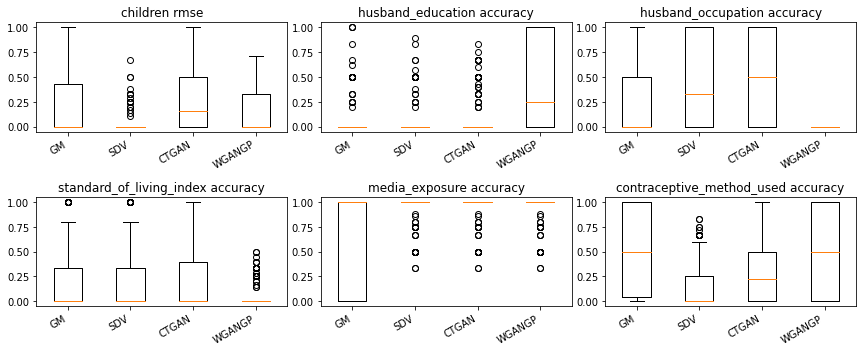

In [14]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12,2.5*2))
axs_idxs = [[0,0], [0,1], [0,2], [1,0], [1,1], [1,2]]
idx = dict(zip(results_columns,axs_idxs))

for c in results_columns :
    ax = axs[idx[c][0], idx[c][1]]
    ax.boxplot(boxplots_data[c])
    ax.set_title(c)
    ax.set_xticklabels(SYNTHESIZERS)
    
for ax in axs.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation = 30, ha="right")    

plt.tight_layout()
fig.savefig('INFERENCE TESTS RESULTS/ATTRIBUTES INFERENCE TESTS RESULTS.svg', bbox_inches='tight')